In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Задание 1

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

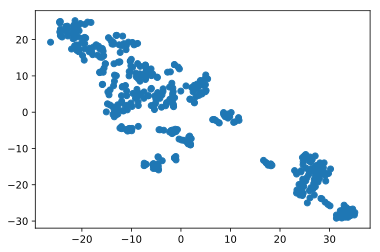

In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

### Задание 2

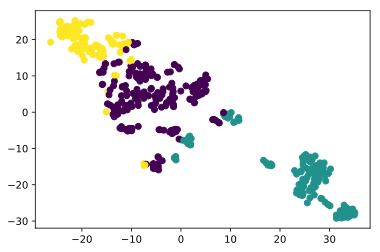

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
train_labels = model.fit_predict(x_train_scaled)
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels)

In [6]:
y_train[train_labels==0].mean(), y_train[train_labels==1].mean(), y_train[train_labels==2].mean()

(price    24.971204
 dtype: float64, price    16.179688
 dtype: float64, price    27.874118
 dtype: float64)

In [7]:
x_train.loc[train_labels==0, 'CRIM'].mean(), x_train.loc[train_labels==1, 'CRIM'].mean(), x_train.loc[train_labels==2, 'CRIM'].mean()

(0.42098554973821983, 10.637094062500003, 0.0721184705882353)

### Задание 3

In [8]:
test_labels = model.predict(x_test_scaled)

In [9]:
y_test[test_labels==0].mean(), y_test[test_labels==1].mean(), y_test[test_labels==2].mean()

(price    21.860784
 dtype: float64, price    16.437143
 dtype: float64, price    31.35
 dtype: float64)

In [10]:
x_test.loc[test_labels==0, 'CRIM'].mean(), x_test.loc[test_labels==1, 'CRIM'].mean(), x_test.loc[test_labels==2, 'CRIM'].mean()

(0.26607882352941176, 10.165531142857143, 0.062060000000000004)